# Ear关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

Base 同济子豪兄 2023-5-23 关键点检测-训练RTMPose

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmpose')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [3]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-Ear/20230604_172709/vis_data/scalars.json'

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
len(json_list)

1772

In [6]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 5.6108194351196286,
 'loss': 0.36653663516044616,
 'loss_kpt': 0.36653663516044616,
 'acc_pose': 0.09183673469387756,
 'time': 5.724349689483643,
 'epoch': 1,
 'iter': 5,
 'memory': 1428,
 'step': 5}

In [7]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1772/1772 [00:00<00:00, 2070.50it/s]


In [8]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,step
0,4.000000e-08,5.585173,0.370093,0.370093,0.013605,5.732510,1.0,1.0,1362.0,1.0
1,2.105642e-04,5.729321,0.369867,0.369867,0.008503,5.858213,1.0,2.0,1428.0,2.0
2,4.210884e-04,5.693778,0.370286,0.370286,0.018707,5.815906,1.0,3.0,1428.0,3.0
3,6.316126e-04,5.634243,0.369123,0.369123,0.025510,5.750692,1.0,4.0,1428.0,4.0
4,8.421368e-04,5.610819,0.366537,0.366537,0.091837,5.724350,1.0,5.0,1428.0,5.0
...,...,...,...,...,...,...,...,...,...,...
1710,2.929926e-04,6.051179,0.033715,0.033715,0.998299,6.157172,286.0,1711.0,1428.0,1711.0
1711,2.909542e-04,6.048865,0.033731,0.033731,0.996599,6.155014,286.0,1712.0,1428.0,1712.0
1712,2.889377e-04,6.055762,0.033667,0.033667,0.998299,6.161950,286.0,1713.0,1428.0,1713.0
1713,2.869434e-04,6.051897,0.033687,0.033687,1.000000,6.158176,286.0,1714.0,1428.0,1714.0


In [9]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.128118,0.003571,0.430091,1.138388,1.156303,5.0
1,0.003351,0.033511,0.000000,-1.0,0.003351,0.007143,0.071429,0.000000,-1.0,0.007143,0.344671,0.010431,0.234370,1.028562,1.044681,10.0
2,0.000071,0.000707,0.000000,-1.0,0.000071,0.002381,0.023810,0.000000,-1.0,0.002381,0.378685,0.012245,0.214833,1.005517,1.020671,15.0
3,0.047060,0.360166,0.000000,-1.0,0.047060,0.073810,0.452381,0.000000,-1.0,0.073810,0.494331,0.018594,0.123777,0.988762,1.006108,20.0
4,0.054323,0.352795,0.000000,-1.0,0.054323,0.088095,0.500000,0.000000,-1.0,0.088095,0.517007,0.010771,0.118397,0.988339,1.005643,25.0
5,0.202633,0.775221,0.011551,-1.0,0.202633,0.273810,0.857143,0.047619,-1.0,0.273810,0.710884,0.020805,0.088635,1.001615,1.017701,30.0
6,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.070295,0.003118,0.455925,1.001095,1.016406,35.0
7,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.102041,0.004535,0.308163,1.001933,1.017416,40.0
8,0.143355,0.598881,0.000000,-1.0,0.143355,0.188095,0.666667,0.000000,-1.0,0.188095,0.597506,0.026417,0.108949,1.026893,1.042937,45.0
9,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.173469,0.007540,0.285704,1.020531,1.036603,50.0


## 导出训练日志表格

In [10]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


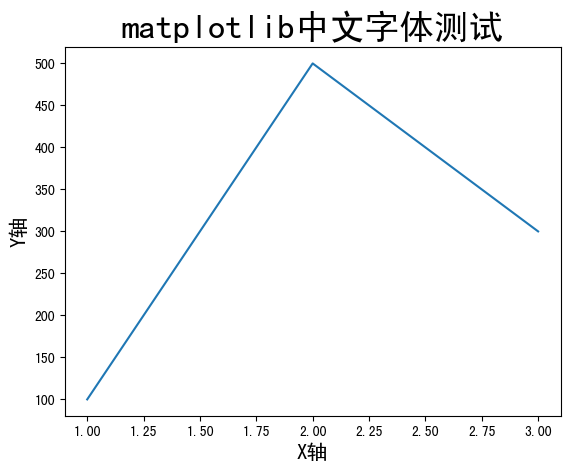

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [16]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

In [17]:
metrics = ['loss', 'loss_kpt']

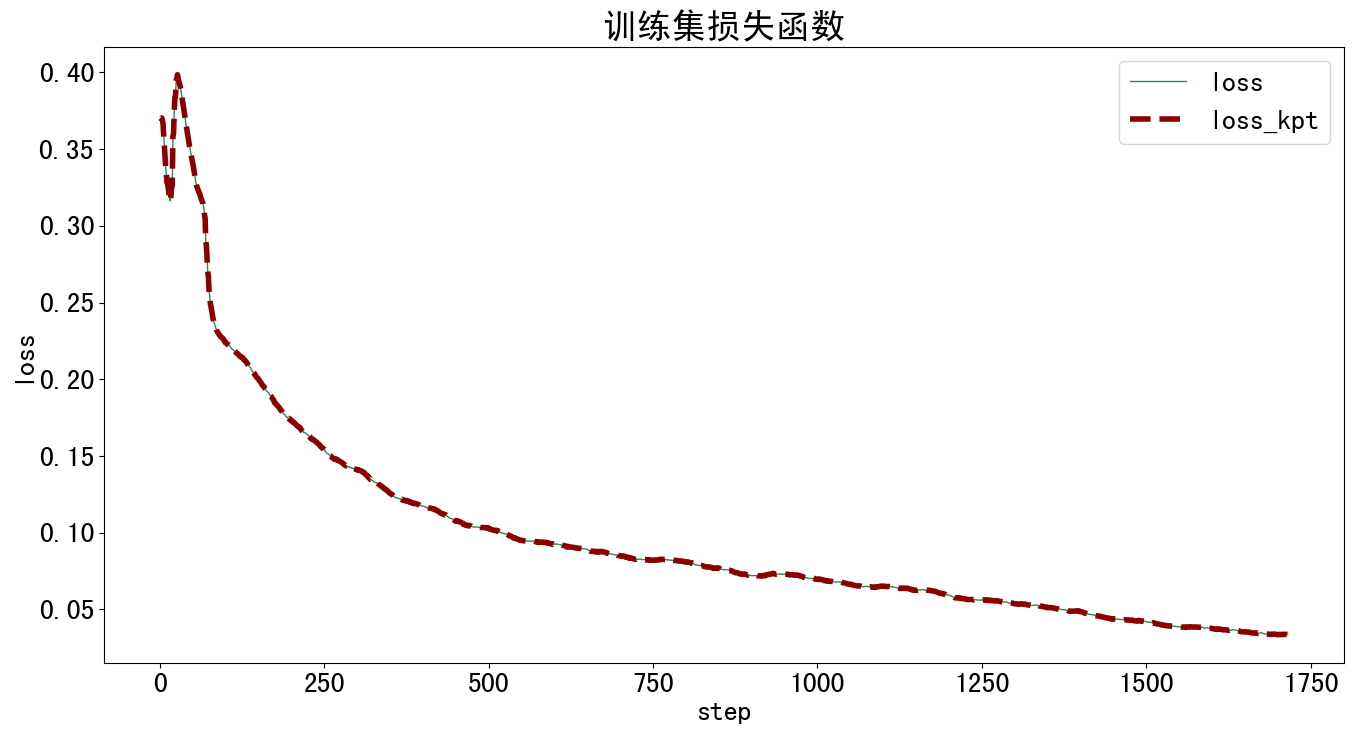

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
metrics = ['acc_pose']

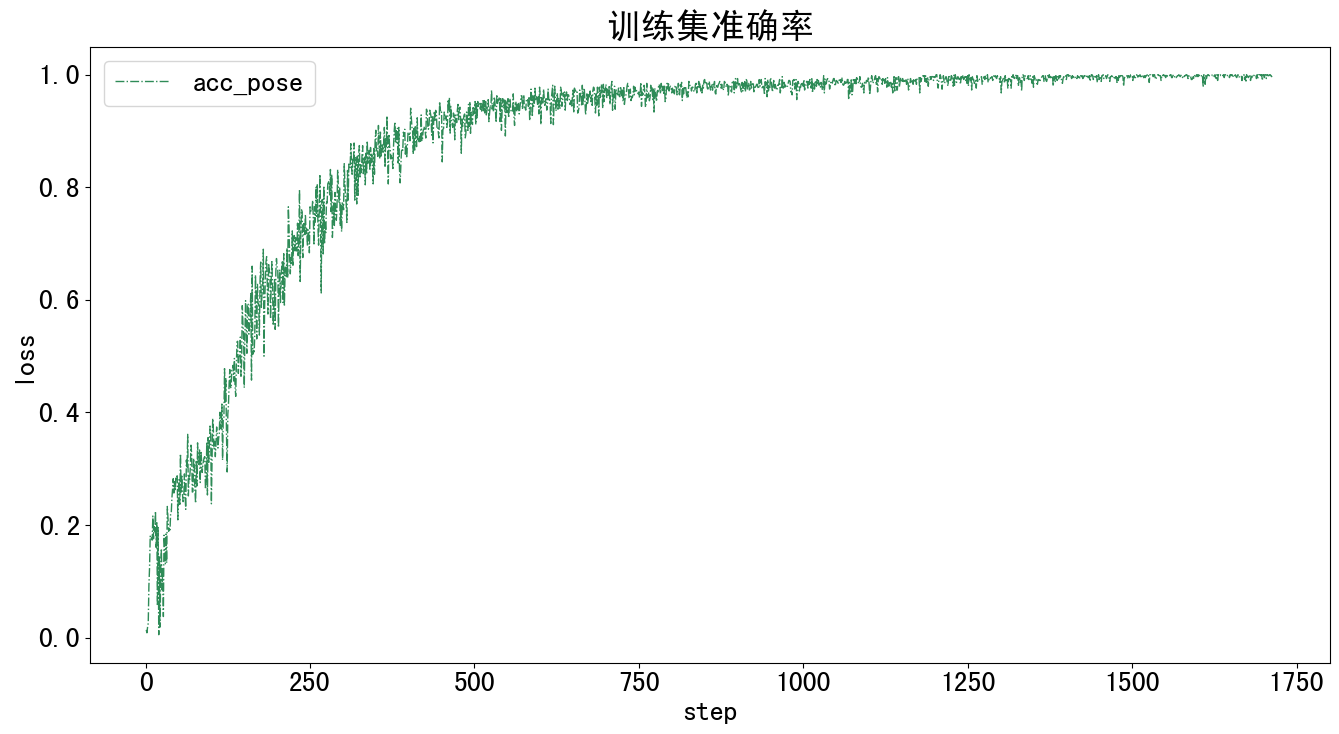

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


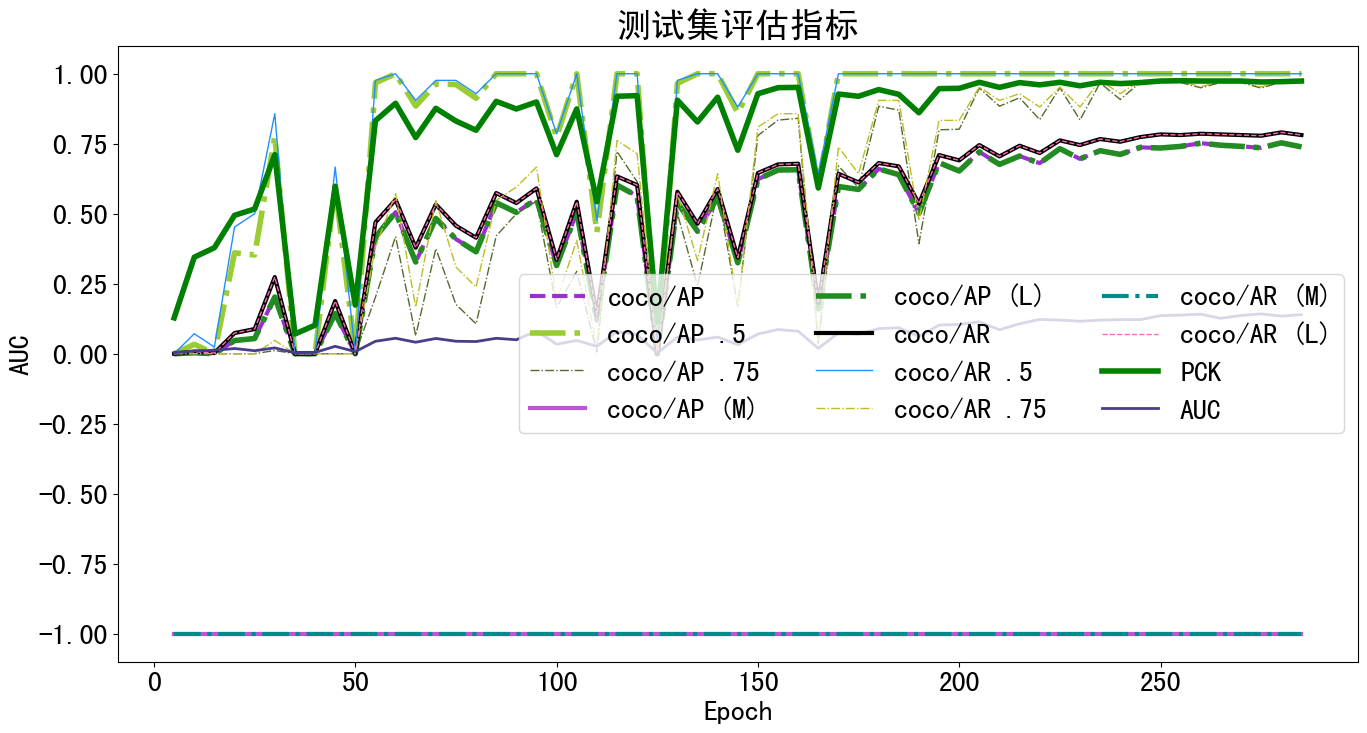

In [29]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20,ncol=3)

plt.show()

## 测试集评估指标-NME

In [28]:
metrics2 = ['NME']

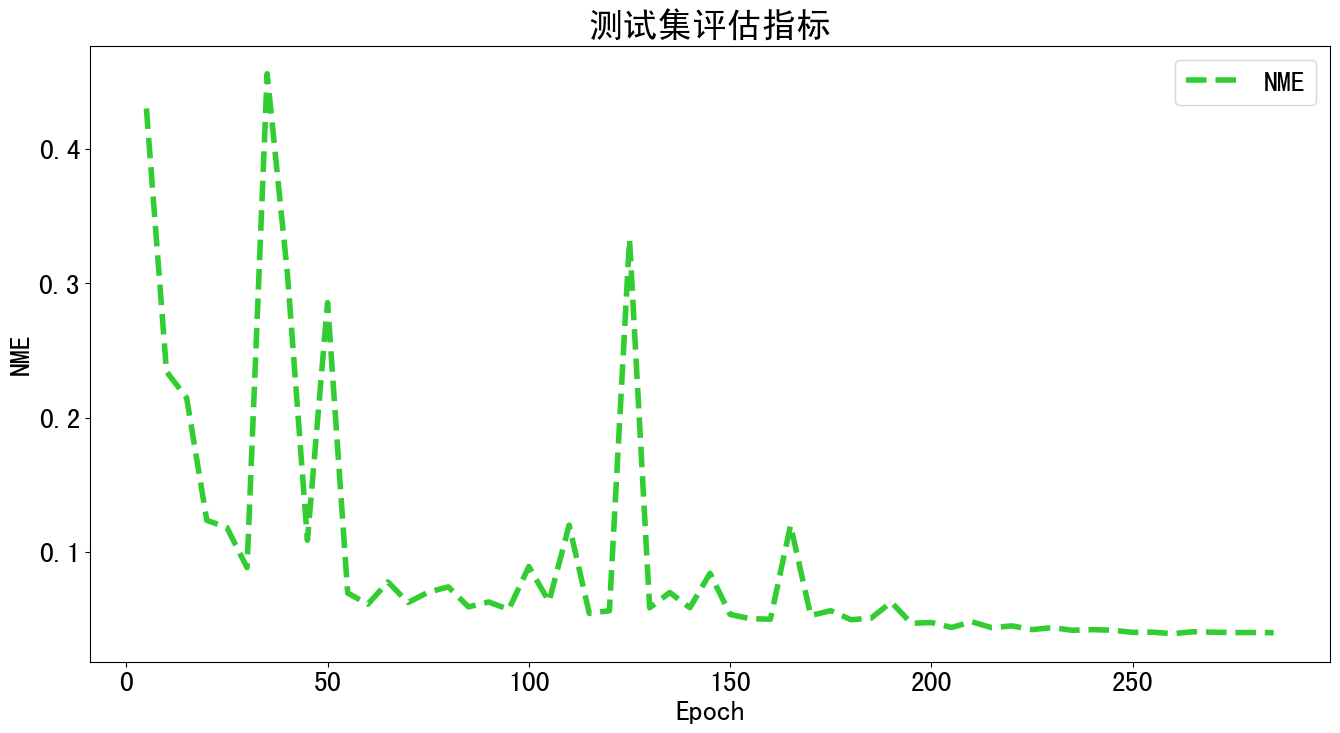

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics2:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()